## Baselines


year: 2022  agent: UCRP 



100%|██████████| 6901/6901 [00:01<00:00, 4247.14it/s]


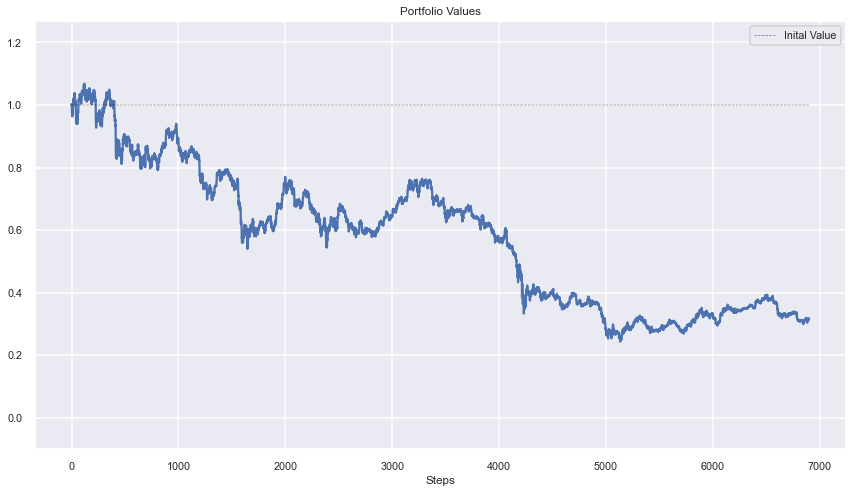

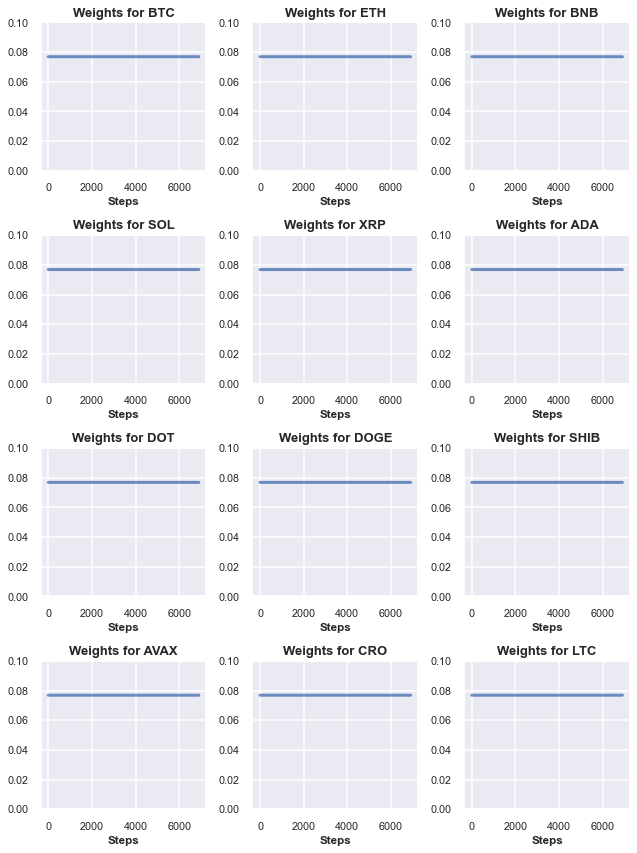

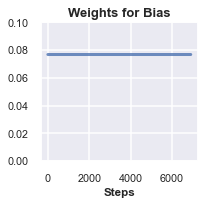

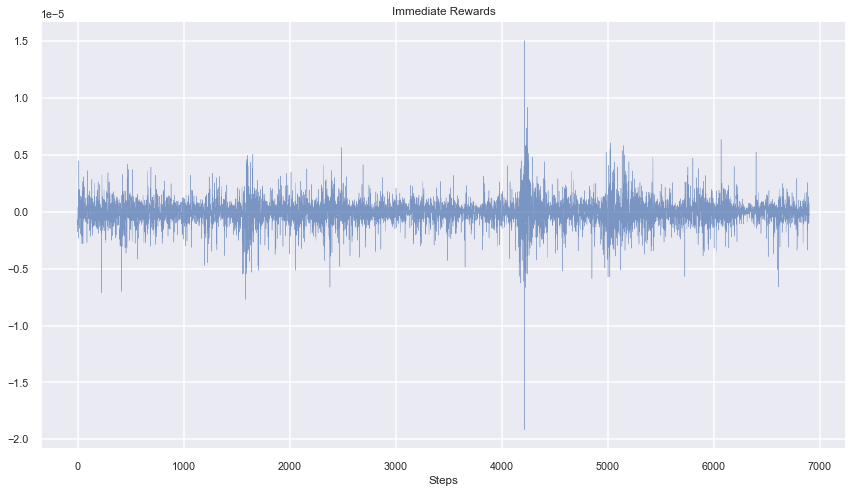

Return: -0.00016346758298063267
Final Portfolio Value:  0.3158630769736335
Sharpe Ratio: -0.014900461268662782
Max Drawdown: 0.7715519254195015
Commission rate 0.0025
Sum of transaction costs 24.116470481340574


In [1]:
from cryptoportfolio.tdagent.benchmarks.ubah import UBAH
from cryptoportfolio.tdagent.benchmarks.ucrp import UCRP
from cryptoportfolio.tdagent.benchmarks.best_stock import BestStock

from cryptoportfolio.tdagent.strategies.anticor1 import ANTICOR1
from cryptoportfolio.tdagent.strategies.anticor2 import ANTICOR2
from cryptoportfolio.tdagent.strategies.bk import BK
from cryptoportfolio.tdagent.strategies.bnn import BNN
from cryptoportfolio.tdagent.strategies.cwmr_std import CWMR_STD
from cryptoportfolio.tdagent.strategies.cwmr_var import CWMR_VAR
from cryptoportfolio.tdagent.strategies.eg import EG
from cryptoportfolio.tdagent.strategies.m0 import M0
from cryptoportfolio.tdagent.strategies.olmar import OLMAR
from cryptoportfolio.tdagent.strategies.olmar2 import OLMAR2
from cryptoportfolio.tdagent.strategies.ons import ONS
from cryptoportfolio.tdagent.strategies.pamr import PAMR
from cryptoportfolio.tdagent.strategies.rmr import RMR
from cryptoportfolio.tdagent.strategies.sp import SP
from cryptoportfolio.tdagent.strategies.up import UP
from cryptoportfolio.tdagent.strategies.wmamr import WMAMR
from tqdm import tqdm

from cryptoportfolio.tools.performance_measures import max_drawdown, sharpe_ratio

baselines = [UCRP()]# UBAH(), BestStock()]#, M0(), ANTICOR2(), UP(), SP(), EG(), ONS(), CWMR_VAR(), OLMAR(), PAMR(), WMAMR()] #done
#baselines = [CWMR_VAR(), EG(), M0(), OLMAR(), ONS(), PAMR()] #done
#baselines = [RMR(), SP(), UP(), WMAMR()] #done
year = "2022"
values = {year:[]}

window_size = 150
for baseline in baselines:
    print(f"\nyear: {year} ", "agent:", baseline._name, "\n")
    baseline.generate_portfolio(year=year, synthetic=False, split="whole")
    obs = baseline.reset(window_size)
    for _ in tqdm(range(baseline._timestep, baseline._crash_length)):    
        action = baseline.decide_weights(obs, baseline._PVM[-1])
        obs, reward, done, info = baseline.step(action)
    baseline.render()
       
    """# Save the results
    data = open("logs/baselines_performance_metrics.csv", "a")
    data.write("\n")
    data.write(baseline._name); data.write(",")
    data.write("2018_real_val"); data.write(",")
    data.write(str(window_size)); data.write(",")
    data.write(str(max_drawdown(baseline._portfolio_values))); data.write(",")
    data.write(str(baseline._portfolio_values[-1])); data.write(",")
    data.write(str(sharpe_ratio(baseline._rates_of_return))); data.write(",")
    data.write(str(baseline._sum_of_transaction_costs))
    data.close()
    
    # Save the results
    data = open("logs/baselines_portfolio_values.csv", "a")   
    data.write("\n")
    data.write(baseline._name); data.write(";")
    data.write("2022"); data.write(";")
    data.write(str(window_size)); data.write(";")
    data.write(str(list(baseline._portfolio_values)))
    data.close()"""
    

<function matplotlib.pyplot.show(close=None, block=None)>

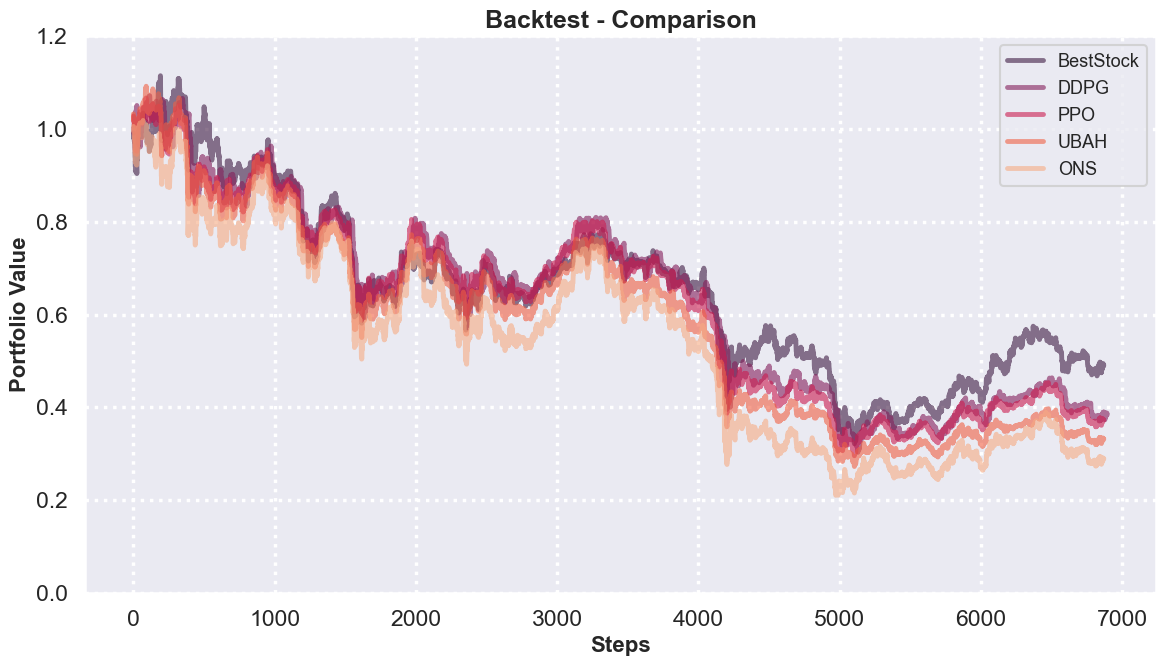

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_context('talk', font_scale=1)

ppo_scenario = "scenario1_nosoft-cnn-mlp_it50"
ddpg_scenario = "scenario2_nosoft-cnn_it50"
df = pd.read_csv("logs/baselines_portfolio_values.csv", sep=";")
portfolio_values = {"BestStock":[], "UCRP":[], "UBAH":[], "Anticor2":[],
                    "CWMR_VAR":[], "EG":[], "M0":[], "OLMAR":[], "ONS":[],
                    "PAMR":[], "RMR":[], "SP":[], "UP":[], "WMAMR":[],
                    f"PPO_{ppo_scenario}":[], f"DDPG_{ddpg_scenario}":[],
}

for index, row in df.iterrows():
    if row["algorithm"] in portfolio_values.keys():
        temp = row["portfolio_values"].split(",")
        temp[0] = temp[0][1:]
        temp[-1] = temp[-1][:-1]
        temp = [float(x) for x in temp]
        portfolio_values[row["algorithm"]] = temp

selection = [
    "BestStock", f"DDPG_{ddpg_scenario}", f"PPO_{ppo_scenario}", 
     "UBAH", "ONS",# "UCRP",  # "ONS", #"Anticor2", "WMAMR",
   # "EG", "M0",  "ONS",  "SP", "UP",# 
]
sns.set_palette("rocket", len(selection))

plt.figure(figsize=(12,7))
for value in selection:
    if value in [f"PPO_{ppo_scenario}", f"DDPG_{ddpg_scenario}"]:
        label = value.split("_")[0]
        if value == f"PPO_{ppo_scenario}":
            plt.plot(portfolio_values[value][38:], label=label, lw=3.5, alpha=0.6)#, linestyle=(0, (5, 1)))
        else:
            plt.plot(portfolio_values[value], label=label, lw=3.5, alpha=0.6)#, linestyle=(0, (5, 1)))
    elif value == "Anticor2":
        plt.plot(portfolio_values[value][38:], label=value, lw=3.5, alpha=0.6) # lw=3.5, alpha=0.7
    else:
        plt.plot(portfolio_values[value][38:], label=value, lw=3.5, alpha=0.6)
    
#plt.plot(np.linspace(0, len(portfolio_values["values"][i])-1, len(portfolio_values["values"][i])), 
#                    [1]*len(portfolio_values["values"][i]), color="black", lw=1, ls="--", alpha=0.5,
#                    label="Inital Value")

plt.grid(True, linestyle="dotted", linewidth=2.5)
plt.title("Backtest - Comparison", fontweight="bold", fontsize=18)
plt.ylabel("Portfolio Value", fontweight="bold", fontsize=16)
plt.xlabel("Steps", fontweight="bold", fontsize=16)
plt.legend(prop={'size': 13})
plt.ylim([0,1.2])
#plt.yscale('log')
plt.tight_layout()
plt.savefig(f"comparison_results.png", dpi=600)
plt.show        

##### Plotting portfolio values

<function matplotlib.pyplot.show(close=None, block=None)>

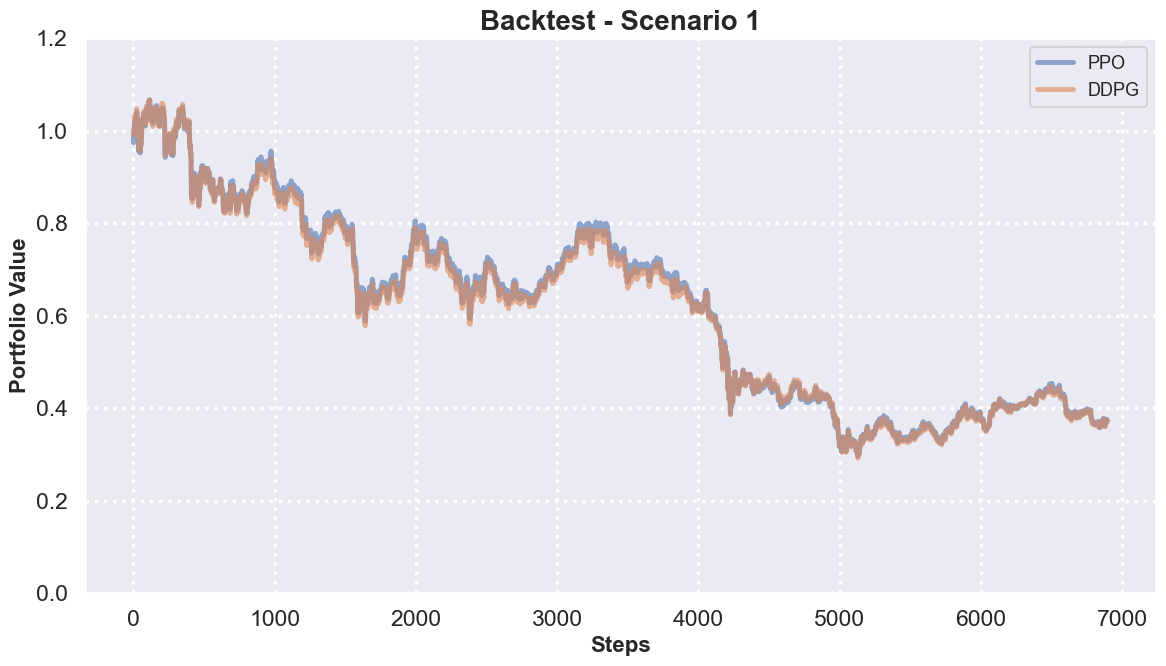

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_context('talk', font_scale=1)

scenarios = {"scenario1":["PPO_scenario1_nosoft-cnn-mlp_it50", "DDPG_scenario1_nosoft-cnn_it50"],
             "scenario2":["PPO_scenario2_nosoft-cnn-mlp_it50", "DDPG_scenario2_nosoft-cnn_it50"],
             "scenario3":["PPO_scenario3_nosoft-cnn-mlp_it30", "DDPG_scenario3_nosoft-cnn_it50"],
             "scenario4":["DDPG_scenario1_nosoft-cnn_it50", "DDPG_scenario4_nosoft-cnn_it50"]}
translation = {"scenario1":"Scenario 1", "scenario2":"Scenario 2", "scenario3":"Scenario 3", "scenario4":"Scenario 4"}

df = pd.read_csv("logs/baselines_portfolio_values.csv", sep=";")
scenario = "scenario1"
ppo_scenario = scenarios[scenario][0]; ddpg_scenario = scenarios[scenario][1]
portfolio_values = {ppo_scenario:[], ddpg_scenario:[], "BestStock":[], "UBAH":[], "ONS":[]}

for index, row in df.iterrows():
    if row["algorithm"] in portfolio_values.keys():
        temp = row["portfolio_values"].split(",")
        temp[0] = temp[0][1:]
        temp[-1] = temp[-1][:-1]
        temp = [float(x) for x in temp]
        portfolio_values[row["algorithm"]] = temp

selection = [ppo_scenario, ddpg_scenario]#, "BestStock", "UBAH", "ONS"]

plt.figure(figsize=(12,7))
#sns.set_palette("rocket_r", len(selection))
lw = 3.5; alpha = 0.6
for value in selection:
    if value == ppo_scenario:
        plt.plot(portfolio_values[value][13:], label="PPO", lw=lw, alpha=alpha)
    elif value == ddpg_scenario:
        plt.plot(portfolio_values[value], label="DDPG", lw=lw, alpha=alpha)#, linestyle=(0, (5, 1)))
    else:
        plt.plot(portfolio_values[value], label=value, lw=lw, alpha=alpha)
    
plt.grid(True, linestyle="dotted", linewidth=2.5)
plt.title(f"Backtest - {translation[scenario]}", fontweight="bold", fontsize=20)
plt.ylabel("Portfolio Value", fontweight="bold", fontsize=16)
plt.xlabel("Steps", fontweight="bold", fontsize=16)
plt.legend(prop={'size': 13})
plt.ylim([0,1.2])
#plt.yscale('log')
plt.tight_layout()
plt.savefig(f"{scenario}_portfolio_values.png", dpi=600)
plt.show        

##### Comparison of all scenarios

<function matplotlib.pyplot.show(close=None, block=None)>

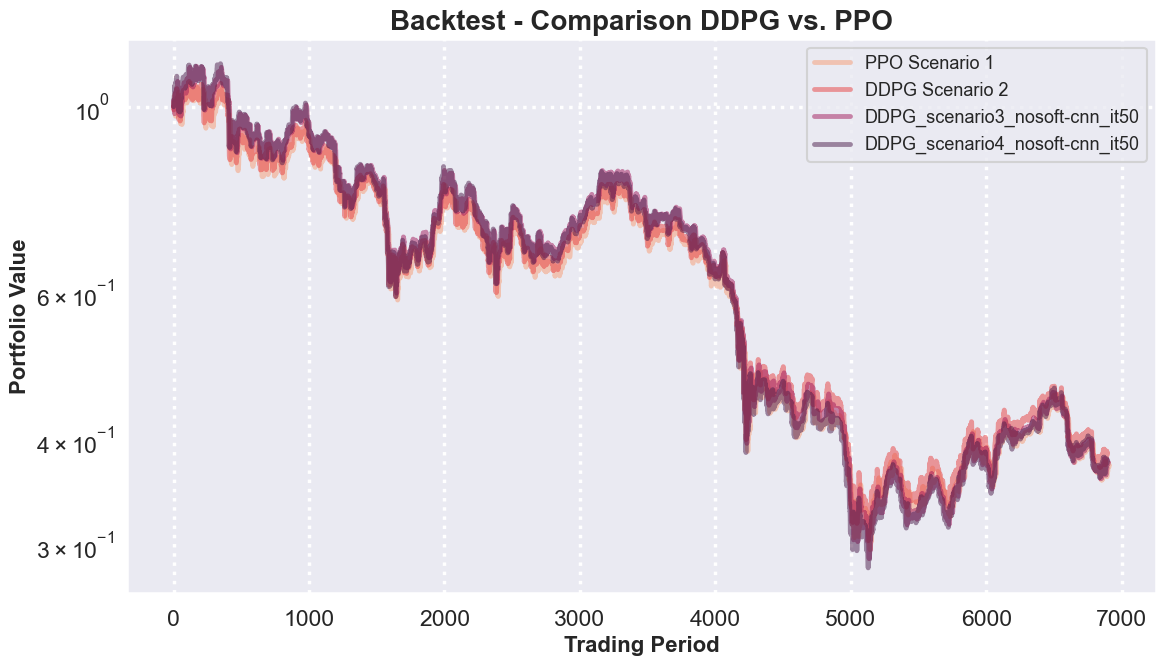

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_context('talk', font_scale=1)

df = pd.read_csv("logs/baselines_portfolio_values.csv", sep=";")
portfolio_values = {
    "PPO_scenario1_nosoft-cnn-mlp_it50":[], "DDPG_scenario1_nosoft-cnn_it50":[],
    "PPO_scenario2_nosoft-cnn-mlp_it50":[], "DDPG_scenario2_nosoft-cnn_it50":[],
    "PPO_scenario3_nosoft-cnn-mlp_it30":[], "DDPG_scenario3_nosoft-cnn_it50":[],
    "PPO_scenario4_nosoft-cnn-mlp_it50":[], "DDPG_scenario4_nosoft-cnn_it50":[],
}

for index, row in df.iterrows():
    if row["algorithm"] in portfolio_values.keys():
        temp = row["portfolio_values"].split(",")
        temp[0] = temp[0][1:]
        temp[-1] = temp[-1][:-1]
        temp = [float(x) for x in temp]
        portfolio_values[row["algorithm"]] = temp

selection = [
    "PPO_scenario1_nosoft-cnn-mlp_it50",
    #"PPO_scenario2_nosoft-cnn-mlp_it50",
    #"PPO_scenario3_nosoft-cnn-mlp_it30",
    #"PPO_scenario4_nosoft-cnn-mlp_it50",
    
    #"DDPG_scenario1_nosoft-cnn_it50",
    "DDPG_scenario2_nosoft-cnn_it50",
    "DDPG_scenario3_nosoft-cnn_it50",
    "DDPG_scenario4_nosoft-cnn_it50",
]

sns.set_palette("rocket_r", len(selection))
plt.figure(figsize=(12,7))
plt.grid(True, linestyle="dotted", linewidth=2.5)
for value in selection:
    #print(value)
    if value == "PPO_scenario1_nosoft-cnn-mlp_it50":
        plt.plot(portfolio_values[value], label="PPO Scenario 1", lw=3.5, alpha=0.5)#, color="r")
    elif value == "DDPG_scenario1_nosoft-cnn_it50":
        plt.plot(portfolio_values[value], label="DDPG Scenario 1", lw=3.5, alpha=0.5)#, color="r")
    elif value == "PPO_scenario2_nosoft-cnn-mlp_it50":
        plt.plot(portfolio_values[value], label="PPO Scenario 2", lw=3.5, alpha=0.5)#, color="r")
                    #linestyle=(0, (5, 1))) # dotted
    elif value == "DDPG_scenario2_nosoft-cnn_it50":
        plt.plot(portfolio_values[value], label="DDPG Scenario 2", lw=3.5, alpha=0.5)#, c="black") # line-dotted
    else:
        plt.plot(portfolio_values[value], label=value, lw=3.5, alpha=0.5)#, c="black") # line-dotted
        
    """elif value == "PPO_scenario3_nosoft-cnn-mlp_it50":
        plt.plot(portfolio_values[value][38:], label=value, lw=1.5, alpha=0.5,
                    color="orange")
                    #linestyle=(0, (5, 1))) # dotted
    elif value == "DDPG_scenario3_nosoft-cnn_it50":
        plt.plot(portfolio_values[value], label=value, lw=0.5, alpha=0.5,
                    ls="-.") # line-dotted"""

plt.title("Backtest - Comparison DDPG vs. PPO", fontweight="bold", fontsize=20)
plt.ylabel("Portfolio Value", fontweight="bold", fontsize=16)
plt.xlabel("Trading Period", fontweight="bold", fontsize=16)
plt.legend(loc=0, prop={'size': 13})
#plt.ylim([0.01,1.2])
plt.yscale('log')
plt.tight_layout()
#plt.savefig("scenario2_comparison.png", dpi=600)
plt.show        